In [ ]:
pip install -U finance-datareader

In [ ]:
pip install --upgrade finance-datareader

In [ ]:
from pandas_datareader import data
import pandas as pd
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.callbacks import EarlyStopping


In [ ]:
def GET_DATA(code, date):
  COMPANY = fdr.DataReader(code, date) #입력 종목에대해 2010년 이후 데이터 가져옴.
  COMPANY = COMPANY.drop(['Open','High','Low', 'Change','Volume'], axis=1)  # close만 가져온다
  COMPANY.columns = [code + '_Close']
  #COMPANY.columns = [code +'_O',code +'_H',code +'_L',code +'_C',code +'_V',code +'_Change']

  KOSPI = fdr.DataReader('KS11', date) #코스피지수
  KOSPI = KOSPI.drop(['Open','High','Low', 'Change','Volume'], axis=1) # close만 가져온다
  KOSPI.columns = ['KOSPI']

  KOSDAQ = fdr.DataReader('KQ11', date) #코스닥지수
  KOSDAQ = KOSDAQ.drop(['Open','High','Low', 'Change','Volume'], axis=1) # close만 가져온다
  KOSDAQ.columns = ['KOSDAQ']

  DJI = fdr.DataReader('DJI', date)  # 다우지수
  DJI = DJI.drop(['Open','High','Low', 'Change','Volume'], axis=1) # close만 가져온다
  DJI.columns = ['DJI']

  SP500 = fdr.DataReader('US500', '2015-01-01') # S&P 500 지수 (NYSE)
  SP500 = SP500.drop(['Open','High','Low', 'Change','Volume'], axis=1) # close만 가져온다
  SP500.columns = ['SP500']

  GOLD = fdr.DataReader('ZG', date) # 금 선물
  GOLD = GOLD.drop(['Open','High','Low', 'Change','Volume'], axis=1) # close만 가져온다
  GOLD.columns = ['GOLD']

  USD_KRW = fdr.DataReader('USD/KRW', date) #환율
  USD_KRW = USD_KRW.drop(['Open','High','Low', 'Change'], axis=1)  # close만 가져온다
  USD_KRW.columns = ['USD_KRW']

  MSCI_KR = fdr.DataReader('156080', date) #MSCI KOREA
  MSCI_KR = MSCI_KR.drop(['Open','High','Low', 'Change','Volume'], axis=1) 
  MSCI_KR.columns = ['MSCI_KR']
  
  VIX = fdr.DataReader(['VIXCLS'], start = date, data_source='fred') # S&P 500 VIX

  # POILDUBUSDM: 두바이유
  # POILWTIUSDM: 서부 텍사스 중질유 
  # 한달에 한번 제공이라 뺌
  OIL = fdr.DataReader(['POILDUBUSDM', 'POILWTIUSDM'],start='2010-01-01', data_source='fred' )

  # M2 통화량
  # NASDAQCOM 나스닥종합지수
  # HSN1F 주택판매지수
  OTHERS = fdr.DataReader(['M2', 'NASDAQCOM', 'HSN1F'], date, data_source='fred')

  #가져온 지표들을 date의 index대로 합친다. 해당 일자에 없는 데이터는 NaN
  df = pd.concat([COMPANY, KOSPI,KOSDAQ, DJI, SP500, GOLD,USD_KRW, MSCI_KR,VIX, OTHERS],axis=1)
  return df

In [ ]:
date = '2017' #디폴트 2010년 이후부터 오늘까지 데이터
code = input("회사종목 입력") 
if code is None or code == '' :
      print("종목입력 없으면 삼성전자 수행")
      code = '005930'
df = GET_DATA(code, date)
df

회사종목 입력
종목입력 없으면 삼성전자 수행


,005930_Close,KOSPI,KOSDAQ,DJI,SP500,GOLD,USD_KRW,MSCI_KR,VIXCLS,NASDAQCOM,HSN1F,M2
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,585.0,NaN
2017-01-02,36100.0,2026.16,632.04,NaN,NaN,NaN,1203.93,11096.0,NaN,NaN,585.0,13214.2
2017-01-03,36480.0,2043.97,636.57,19881.76,NaN,NaN,1206.82,11181.0,12.85,5429.08,585.0,13214.2
2017-01-04,36160.0,2045.64,639.79,19942.16,NaN,1247.1,1196.15,11190.0,11.85,5477.00,585.0,13214.2
2017-01-05,35560.0,2041.95,642.48,19899.29,NaN,1262.1,1182.19,11185.0,11.67,5487.94,585.0,13214.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,83000.0,2944.45,977.62,30223.89,NaN,1946.6,1086.48,19435.0,26.97,12698.45,841.0,19071.8
2021-01-05,83900.0,2990.57,985.76,30391.60,NaN,1954.4,1086.42,19795.0,25.34,12818.96,841.0,19071.8
2021-01-06,82200.0,2968.21,981.39,30829.40,NaN,1908.6,1087.93,19550.0,25.07,12740.79,841.0,19071.8
2021-01-07,82900.0,3031.68,988.86,31041.13,NaN,1913.6,1094.28,19985.0,22.37,13067.48,841.0,19071.8


In [ ]:
df1=df.dropna(subset=[code+'_Close'])

In [ ]:
df1.isnull().sum()

005930_Close      0
KOSPI             0
KOSDAQ            0
DJI              30
SP500           986
GOLD            184
USD_KRW           0
MSCI_KR           0
VIXCLS            2
NASDAQCOM         1
HSN1F             0
M2                0
dtype: int64

In [ ]:
df1 = df1.drop(['SP500', 'MSCI_KR', 'GOLD','HSN1F'], axis=1)
#df1 = df1.drop([code+'_O', code+'_H', code+'_L', code+'_V' ,code+'_Change'], axis=1)
# 결측치가 많은것은 일단 제외, 개별 종가 제외

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 986 entries, 2017-01-02 to 2021-01-08
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   005930_Close  986 non-null    float64
 1   KOSPI         986 non-null    float64
 2   KOSDAQ        986 non-null    float64
 3   DJI           956 non-null    float64
 4   USD_KRW       986 non-null    float64
 5   VIXCLS        984 non-null    float64
 6   NASDAQCOM     985 non-null    float64
 7   M2            986 non-null    float64
dtypes: float64(8)
memory usage: 69.3 KB


In [ ]:
df1.isnull().sum()

005930_Close     0
KOSPI            0
KOSDAQ           0
DJI             30
USD_KRW          0
VIXCLS           2
NASDAQCOM        1
M2               0
dtype: int64

In [ ]:
df1=df1.dropna(subset=["DJI"])

In [ ]:
df1 = df1.dropna()

In [ ]:
df1 

,005930_Close,KOSPI,KOSDAQ,DJI,USD_KRW,VIXCLS,NASDAQCOM,M2
2017-01-03,36480.0,2043.97,636.57,19881.76,1206.82,12.85,5429.08,13214.2
2017-01-04,36160.0,2045.64,639.79,19942.16,1196.15,11.85,5477.00,13214.2
2017-01-05,35560.0,2041.95,642.48,19899.29,1182.19,11.67,5487.94,13214.2
2017-01-06,36200.0,2049.12,643.68,19963.80,1202.00,11.32,5521.06,13214.2
2017-01-09,37220.0,2048.78,642.15,19887.38,1203.36,11.56,5531.82,13257.3
...,...,...,...,...,...,...,...,...
2020-12-30,81000.0,2873.47,968.42,30409.56,1087.62,22.77,12870.00,19071.8
2021-01-04,83000.0,2944.45,977.62,30223.89,1086.48,26.97,12698.45,19071.8
2021-01-05,83900.0,2990.57,985.76,30391.60,1086.42,25.34,12818.96,19071.8
2021-01-06,82200.0,2968.21,981.39,30829.40,1087.93,25.07,12740.79,19071.8


In [ ]:
returns = pd.DataFrame()
for d in df1:
  returns[d+' pct'] = df1[d].pct_change()
returns.head()

,005930_Close pct,KOSPI pct,KOSDAQ pct,DJI pct,USD_KRW pct,VIXCLS pct,NASDAQCOM pct,M2 pct
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.008772,0.000817,0.005058,0.003038,-0.008841,-0.077821,0.008827,0.000000
2017-01-05,-0.016593,-0.001804,0.004205,-0.002150,-0.011671,-0.015190,0.001997,0.000000
2017-01-06,0.017998,0.003511,0.001868,0.003242,0.016757,-0.029991,0.006035,0.000000
2017-01-09,0.028177,-0.000166,-0.002377,-0.003828,0.001131,0.021201,0.001949,0.003262


In [ ]:
import seaborn as sns
sns.pairplot(returns[1:])

NameError: ignored

#   MACD와 MACD Oscillator 지표

In [ ]:
COMPANY = fdr.DataReader('005930', '2020-06-01') 
COMPANY = COMPANY.drop(['Open','High','Low', 'Change','Volume'], axis=1)  # close만 가져온다
COMPANY.columns = ['SAMSUNG_C']

In [ ]:
COMPANY

,SAMSUNG_C
Date,
2020-06-01,51200
2020-06-02,51400
2020-06-03,54500
2020-06-04,54600
2020-06-05,55500
...,...
2021-01-06,82200
2021-01-07,82900
2021-01-08,88800


In [ ]:
def getMACD(df, short=12, long=26, signal=9):
  df['MACD'] = COMPANY['SAMSUNG_C'].ewm(span = short, min_periods = short -1, adjust=False).mean() - COMPANY['SAMSUNG_C'].ewm(span=long, min_periods = long-1, adjust=False).mean()
  df['MACD_Signal'] = df['MACD'].ewm(span=signal, min_periods = signal-1, adjust=False).mean()
  df['MACD_OSC'] = df['MACD'] - df['MACD_Signal']
  return df
COMPANY = getMACD(COMPANY)


In [ ]:
COMPANY=COMPANY.dropna()
COMPANY

,SAMSUNG_C,MACD,MACD_Signal,MACD_OSC
Date,,,,
2020-07-14,53800,260.503174,242.177070,18.326104
2020-07-15,54700,361.484635,266.038583,95.446052
2020-07-16,53800,364.686809,285.768228,78.918581
2020-07-17,54400,410.902908,310.795164,100.107744
2020-07-20,54200,426.475032,333.931138,92.543894
...,...,...,...,...
2021-01-06,82200,3861.466432,3250.559713,610.906719
2021-01-07,82900,3915.848476,3383.617465,532.231010
2021-01-08,88800,4384.485707,3583.791114,800.694593


In [ ]:
import plotly.graph_objects as go

fig = go.Figure() 
fig.add_trace(go.Scatter(x=COMPANY.index, y=COMPANY["MACD"], mode='lines', name="MACD")) 
fig.add_trace(go.Scatter(x=COMPANY.index, y=COMPANY["MACD_Signal"], mode='lines', name="MACD_Signal")) 
fig.add_trace(go.Bar(x=COMPANY.index, y=COMPANY["MACD_OSC"], name="MACD_OSC", width=2.5, marker_color='Black')) 
fig.add_trace(go.Scatter(x=COMPANY.index, y=np.zeros(len(COMPANY.index)),name='0', line = dict(color='gray', width=2, dash='dot'))) 
fig.update_layout(title='MACD 16 26 9', xaxis_title='days', yaxis_title='MACD') 
fig.show()

In [ ]:
fig = go.Figure() 
fig.add_trace(go.Scatter(x=COMPANY.index, y=COMPANY["MACD_OSC"], mode='lines', name="Close")) 
fig.update_layout(title='Close', xaxis_title='days', yaxis_title='StockValue') 
fig.show()
# 음 -> 양 매수 포인트
# 양 -> 음 매도 포인트


In [ ]:
COMPANY = COMPANY.drop(['MACD','MACD_Signal'], axis=1) 
 # MACD_OSC 찍어보기~
COMPANY= COMPANY.dropna()

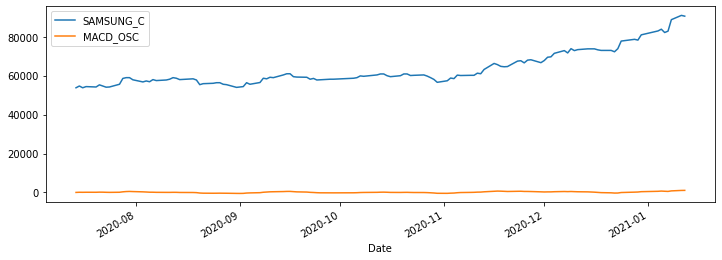

In [ ]:
for col in COMPANY:
    COMPANY[col].plot(figsize=(12,4),label=col)
plt.legend()

In [ ]:
COMPANY = COMPANY.reset_index()

In [ ]:
COMPANY

,Date,SAMSUNG_C,MACD_OSC
0,2020-07-14,53800,18.326104
1,2020-07-15,54700,95.446052
2,2020-07-16,53800,78.918581
3,2020-07-17,54400,100.107744
4,2020-07-20,54200,92.543894
...,...,...,...
118,2021-01-06,82200,610.906719
119,2021-01-07,82900,532.231010
120,2021-01-08,88800,800.694593
121,2021-01-11,91000,1034.714753


In [ ]:
#정규화 해주려고 날짜 인덱스는 잠시 다른곳에 저장해두자
DATE = COMPANY['Date']
COMPANY = COMPANY.drop(['Date'], axis=1) 


In [ ]:
 def min_max_normalize(lst):
    normalized = []
    for value in lst:
      normalized_num = (value - min(lst)) / (max(lst) - min(lst))
      normalized.append(normalized_num)
    return normalized 

In [ ]:
nor_COMPANY = pd.DataFrame()
for col in COMPANY:
  nor_COMPANY[col] = pd.DataFrame(min_max_normalize(COMPANY[col])) 

In [ ]:
COMPANY

,SAMSUNG_C,MACD_OSC
DATE,,
2010-02-17,0.026330,0.603624
2010-02-18,0.025266,0.614560
2010-02-19,0.021277,0.612219
2010-02-22,0.024734,0.619635
2010-02-23,0.023138,0.620518
...,...,...
2021-01-04,0.922872,0.893380
2021-01-05,0.934840,0.954009
2021-01-06,0.912234,0.904469


In [ ]:
DATE

0      2010-02-17
1      2010-02-18
2      2010-02-19
3      2010-02-22
4      2010-02-23
          ...    
2683   2021-01-04
2684   2021-01-05
2685   2021-01-06
2686   2021-01-07
2687   2021-01-08
Name: Date, Length: 2688, dtype: datetime64[ns]

In [ ]:
COMPANY["DATE"] = DATE
COMPANY = COMPANY.set_index("DATE")

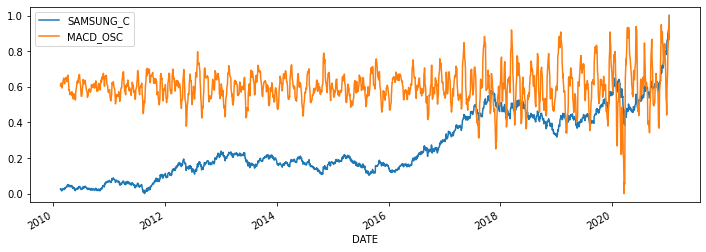

In [ ]:
for col in COMPANY:
    COMPANY[col].plot(figsize=(12,4),label=col)
plt.legend()

정규화


In [ ]:
df1
df1 = df1.reset_index()

In [ ]:
#정규화 해주려고 날짜 인덱스는 다른곳에 저장해두자
index = df1['index']
y_value = df1[code+'_Close']
x_value = df1.drop(['index', code+'_Close'],axis=1)

In [ ]:
x_value

,KOSPI,KOSDAQ,DJI,USD_KRW,VIXCLS,NASDAQCOM,HSN1F,M2
0,1696.14,528.09,18702.360043,1150.00,20.040000,2308.420000,345.000000,8438.700000
1,1690.62,533.09,18702.360043,1140.20,19.350000,2308.710000,345.000000,8438.700000
2,1705.32,539.12,18702.360043,1129.20,19.160000,2301.090000,345.000000,8438.700000
3,1683.45,535.52,18702.360043,1138.20,19.060000,2300.050000,345.000000,8438.700000
4,1695.26,538.96,18702.360043,1128.25,18.130000,2317.170000,345.000000,8438.700000
...,...,...,...,...,...,...,...,...
2710,2806.86,928.68,30199.870000,1101.59,21.530000,12804.730000,841.000000,19197.000000
2711,2808.60,927.00,30403.970000,1095.60,21.700000,12899.420000,841.000000,19197.000000
2712,2820.51,957.41,30335.670000,1090.97,23.080000,12850.220000,841.000000,19197.000000
2713,2873.47,968.42,30409.560000,1087.62,22.770000,12870.000000,841.000000,19197.000000


In [ ]:
for column_name in x_value:
  x_value[column_name] = pd.DataFrame(min_max_normalize(x_value[column_name]))  

In [ ]:
x_value

,KOSPI,KOSDAQ,DJI,USD_KRW,VIXCLS,NASDAQCOM,HSN1F,M2
0,0.160411,0.208671,0.435065,0.533649,0.148199,0.020044,0.105783,0.000617
1,0.156698,0.217473,0.435065,0.496493,0.138817,0.020071,0.105783,0.000617
2,0.166585,0.228088,0.435065,0.454787,0.136234,0.019366,0.105783,0.000617
3,0.151875,0.221751,0.435065,0.488910,0.134874,0.019270,0.105783,0.000617
4,0.159819,0.227806,0.435065,0.451185,0.122230,0.020854,0.105783,0.000617
...,...,...,...,...,...,...,...,...
2710,0.907460,0.913849,0.989881,0.350104,0.168457,0.991239,0.805360,0.990614
2711,0.908630,0.910891,0.999730,0.327393,0.170768,1.000000,0.805360,0.990614
2712,0.916640,0.964423,0.996434,0.309839,0.189531,0.995448,0.805360,0.990614
2713,0.952260,0.983805,1.000000,0.297137,0.185316,0.997278,0.805360,0.990614


In [ ]:
y_value

0       16180.0
1       16440.0
2       16820.0
3       16260.0
4       16420.0
         ...   
2710    77800.0
2711    78700.0
2712    78300.0
2713    81000.0
2714    83000.0
Name: 005930_C, Length: 2715, dtype: float64

#  Prophet 모델

In [ ]:
from fbprophet import Prophet # Prophet

In [ ]:
pip install workalendar

     |████████████████████████████████| 194kB 4.2MB/s 
     |████████████████████████████████| 16.9MB 228kB/s 
     |████████████████████████████████| 389kB 31.9MB/s 
     |████████████████████████████████| 40kB 3.7MB/s 
     |████████████████████████████████| 266kB 43.2MB/s 
  Created wheel for pyCalverter: filename=pyCalverter-1.6.1-cp36-none-any.whl size=4201 sha256=edc447a71496b59fd19a8b71066a139225b4b7b75db3820614093d53fb08df1b
  Stored in directory: /root/.cache/pip/wheels/77/4d/86/db4ff4eca6178dbbd5a365d095f97f6021e2a48f09908be79c
  Created wheel for skyfield: filename=skyfield-1.35-cp36-none-any.whl size=426063 sha256=704fcc81bbdc88eb124b4301c845c14699aebdcb94c107b93ef155be325a5a90
  Stored in directory: /root/.cache/pip/wheels/c3/23/a0/f96e65560e3a099ac6db983cd07d6a787c2c6de4ef79e962c5
  Created wheel for jplephem: filename=jplephem-2.15-cp36-none-any.whl size=46018 sha256=39a2ecae9e207d5464b6bfd38e14862b1def394db810f00f174f2523cf2029c1
  Stored in directory: /root/.cache/pip/

In [ ]:
COMPANY = fdr.DataReader('005930', '2019-01-01') 
COMPANY = COMPANY.drop(['Open','High','Low', 'Change','Volume'], axis=1)  # close만 가져온다
COMPANY.columns = ['SAMSUNG_C']

In [ ]:
COMPANY = COMPANY.reset_index()  #인덱스 날림

In [ ]:
COMPANY

,Date,SAMSUNG_C
0,2019-01-02,38750
1,2019-01-03,37600
2,2019-01-04,37450
3,2019-01-07,38750
4,2019-01-08,38100
...,...,...
496,2021-01-06,82200
497,2021-01-07,82900
498,2021-01-08,88800
499,2021-01-11,91000


In [ ]:
COMPANY = COMPANY.rename(columns={'Date': 'ds', 'SAMSUNG_C': 'y'})

In [ ]:
prop_model=Prophet(yearly_seasonality='auto',    # 	Fit yearly seasonality
     weekly_seasonality='auto',
     daily_seasonality='auto',
     changepoint_prior_scale=0.5,  # chainging_prior_scale : changepoint의 유연성 조절(default : 0.05), 높게잡으면, overfitting위험    
     changepoint_range=0.9,        # changepoint_range : 데이터중, 얼마나 반영해서 changeoint를 정할 것인지(default : 0.8) 
     mcmc_samples=0,
     interval_width=0.95
    )


# model = Prophet()
m_samsung = prop_model
m_samsung.add_country_holidays(country_name='KR')    # 국가(한국)의 휴일을 사용
m_samsung.fit(COMPANY)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
from workalendar.asia import SouthKorea
kor_holidays = pd.concat([pd.Series(np.array(SouthKorea().holidays(2020))[:, 0]), pd.Series(np.array(SouthKorea().holidays(2021))[:, 0])]).reset_index(drop=True)

future_samsung = m_samsung.make_future_dataframe(periods=5)        # 예측 날짜 구간을 설정 : '5일'
future_samsung = future_samsung[future_samsung.ds.dt.weekday != 5]           # 금요일 배제
future_samsung = future_samsung[future_samsung.ds.dt.weekday != 6]           # 토요일 배제
for kor_holiday in kor_holidays:
    future_samsung = future_samsung[future_samsung.ds != kor_holiday]        # 휴일 배제
    
future_samsung

,ds
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08
...,...
499,2021-01-11
500,2021-01-12
501,2021-01-13
502,2021-01-14


In [ ]:
future_samsung = m_samsung.predict(future_samsung)
future_samsung.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,Alternative holiday of Children's Day_upper,Alternative holiday of Lunar New Year's Day,Alternative holiday of Lunar New Year's Day_lower,Alternative holiday of Lunar New Year's Day_upper,Alternative public holiday,Alternative public holiday_lower,Alternative public holiday_upper,Birthday of the Buddha,Birthday of the Buddha_lower,Birthday of the Buddha_upper,Children's Day,Children's Day_lower,Children's Day_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Chuseok,Chuseok_lower,Chuseok_upper,Hangeul Day,Hangeul Day_lower,Hangeul Day_upper,Independence Movement Day,Independence Movement Day_lower,Independence Movement Day_upper,Labour Day,Labour Day_lower,Labour Day_upper,Liberation Day,Liberation Day_lower,Liberation Day_upper,Lunar New Year's Day,Lunar New Year's Day_lower,Lunar New Year's Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,National Foundation Day,National Foundation Day_lower,National Foundation Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,The day preceding of Chuseok,The day preceding of Chuseok_lower,The day preceding of Chuseok_upper,The day preceding of Lunar New Year's Day,The day preceding of Lunar New Year's Day_lower,The day preceding of Lunar New Year's Day_upper,The second day of Chuseok,The second day of Chuseok_lower,The second day of Chuseok_upper,The second day of Lunar New Year's Day,The second day of Lunar New Year's Day_lower,The second day of Lunar New Year's Day_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
484,2020-12-16,75577.200765,71398.767828,76468.871028,75577.200765,75577.200765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1597.740587,-1597.740587,-1597.740587,0.0,0.0,0.0,-404.245736,-404.245736,-404.245736,-1193.494852,-1193.494852,-1193.494852,0.0,0.0,0.0,73979.460178
485,2020-12-17,75864.476626,71828.910575,76959.328846,75864.476626,75864.476626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1611.518078,-1611.518078,-1611.518078,0.0,0.0,0.0,-502.247345,-502.247345,-502.247345,-1109.270733,-1109.270733,-1109.270733,0.0,0.0,0.0,74252.958548
486,2020-12-18,76151.752487,72227.887970,77226.525199,76151.752487,76151.752487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1463.683622,-1463.683622,-1463.683622,0.0,0.0,0.0,-449.859221,-449.859221,-449.859221,-1013.824401,-1013.824401,-1013.824401,0.0,0.0,0.0,74688.068865
487,2020-12-21,77013.580069,73381.728569,78227.115002,77013.580069,77013.580069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1280.709195,-1280.709195,-1280.709195,0.0,0.0,0.0,-635.372592,-635.372592,-635.372592,-645.336603,-645.336603,-645.336603,0.0,0.0,0.0,75732.870874
488,2020-12-22,77300.855930,73888.194616,78826.939989,77300.855930,77300.855930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-931.08

In [ ]:
future_samsung[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2019-01-02,36767.850070,39228.109757,34453.527052
1,2019-01-03,37091.716319,39431.225978,34563.309895
2,2019-01-04,37569.121570,39902.608318,34982.618530
3,2019-01-07,38651.336764,41037.886071,36147.522527
4,2019-01-08,39258.174478,41756.257789,36671.805231
...,...,...,...,...
499,2021-01-11,87367.633875,89755.440498,85007.140436
500,2021-01-12,88093.994928,90601.361968,85694.574027
501,2021-01-13,88642.861218,91213.630363,86316.031120
502,2021-01-14,89039.229316,91557.673178,86532.801880


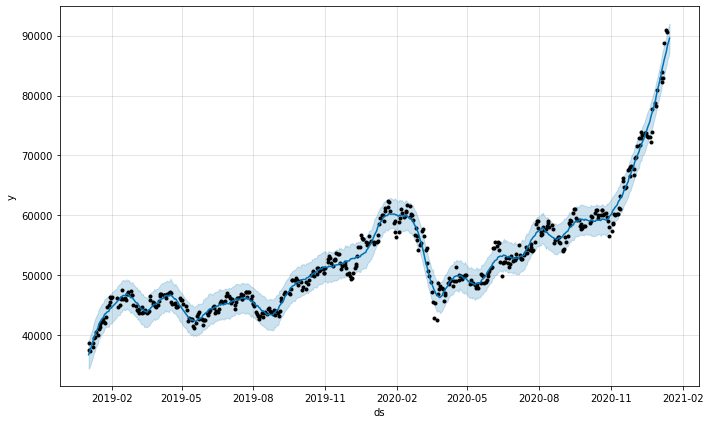

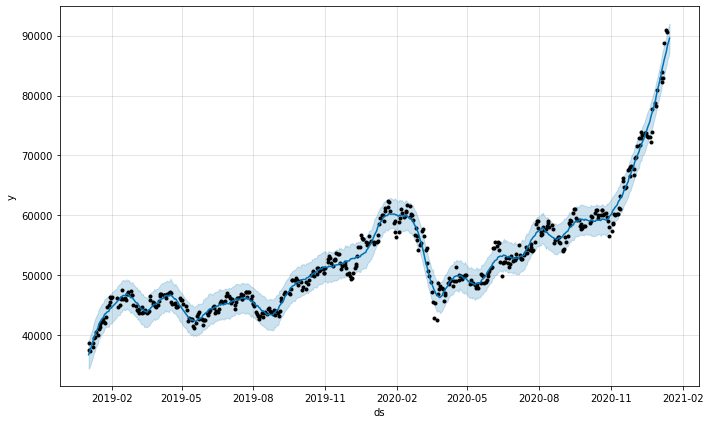

In [ ]:
m_samsung.plot(future_samsung)

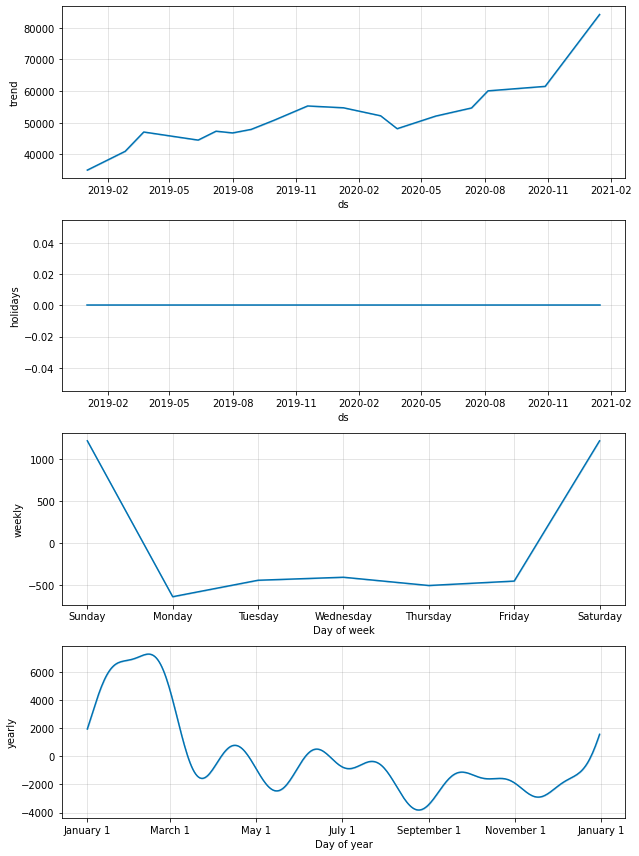

In [ ]:
# 예측
fig2 = m_samsung.plot_components(future_samsung)


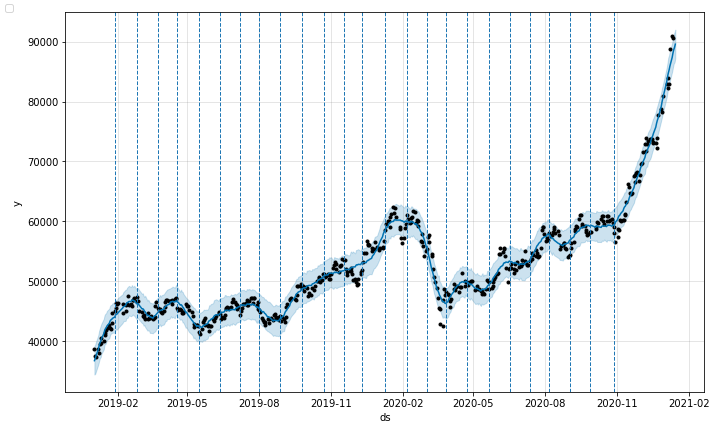

In [ ]:
figure = m_samsung.plot(future_samsung)
for changepoint in m_samsung.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)      # changing_point선 생성
figure.legend(loc=2)                            # 박스안 위치 조정

In [ ]:
list(m_samsung.changepoints)

[Timestamp('2019-01-28 00:00:00'),
 Timestamp('2019-02-26 00:00:00'),
 Timestamp('2019-03-25 00:00:00'),
 Timestamp('2019-04-18 00:00:00'),
 Timestamp('2019-05-16 00:00:00'),
 Timestamp('2019-06-12 00:00:00'),
 Timestamp('2019-07-08 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-08-28 00:00:00'),
 Timestamp('2019-09-25 00:00:00'),
 Timestamp('2019-10-23 00:00:00'),
 Timestamp('2019-11-18 00:00:00'),
 Timestamp('2019-12-11 00:00:00'),
 Timestamp('2020-01-09 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-03-03 00:00:00'),
 Timestamp('2020-03-27 00:00:00'),
 Timestamp('2020-04-23 00:00:00'),
 Timestamp('2020-05-22 00:00:00'),
 Timestamp('2020-06-17 00:00:00'),
 Timestamp('2020-07-13 00:00:00'),
 Timestamp('2020-08-06 00:00:00'),
 Timestamp('2020-09-02 00:00:00'),
 Timestamp('2020-09-28 00:00:00'),
 Timestamp('2020-10-28 00:00:00')]